In [7]:
import os
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [8]:
dataroot = Path("./assets/preprocessed")
train_path = dataroot / "Train_nus-wide.ndjson"
test_path = dataroot / "Test_nus-wide.ndjson"

In [9]:
test = pl.read_ndjson(test_path)
train = pl.read_ndjson(train_path)

test = set(test["file_name"])
train = set(train["file_name"])
test.intersection(train)

set()

In [10]:
test = pl.read_ndjson(test_path)
tsample = test
#tsample = tsample.filter(pl.col("labels").list.len() > 3)
tsample = tsample.sample(4, seed=47)
tsample.glimpse()

Rows: 4
Columns: 4
$ file_name        <str> '0465_1415162250.jpg', '0545_1099938121.jpg', '0588_1424050454.jpg', '0394_193235888.jpg'
$ labels     <list[str]> ['clouds', 'lake', 'sky', 'water'], ['sky'], ['person'], ['vehicle', 'window']
$ tags       <list[str]> ['ocean', 'ship', 'cruise'], ['india', 'bus'], ['china'], ['film', 'car', 'cars', 'auto', 'vehicle', 'track', 'automobile']
$ image_root       <str> './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images'



In [11]:
#from scripts.test import trainer, data, compose_model
#os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])
#
#alignment = {"verticalalignment": "center", "horizontalalignment": "center"}
#
#compose = compose_model()
#top5 = compose_model(mode="vcnn+mlp+lp", topk=5)
#
#preds_compose = trainer.predict(compose, datamodule=data)
#preds_top5 = trainer.predict(top5, datamodule=data)
#fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(5.5, 3.5), layout="constrained")
#for ax in axs.ravel():
#    ax.set_axis_off()
#for i, txt in enumerate(["Image", "Truth", "Top 5 pred", "Model pred"]):
#    axs[i,0].text(0, 0.5, txt, **alignment)
#for i, path in enumerate(tsample["file_name"]):
#    img_path = Path(tsample["image_root"][i], path)
#    img = plt.imread(img_path)
#    axs[0,i+1].imshow(img)
#    axs[1,i+1].text(0.5, 0.5, "\n".join(tsample["labels"][i]), **alignment)
#    axs[2,i+1].text(0.5, 0.5, "\n".join(preds_top5[0][i] if len(preds_top5[0][i]) > 0 else ["-"]), **alignment)
#    axs[3,i+1].text(0.5, 0.5, "\n".join(preds_compose[0][i] if len(preds_compose[0][i]) > 0 else ["-"]), **alignment)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


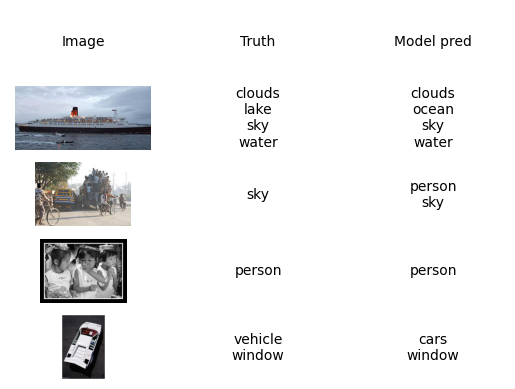

In [12]:
from scripts.test import trainer, data, compose_model
os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])

alignment = {"verticalalignment": "center", "horizontalalignment": "center"}

model = compose_model()

preds = trainer.predict(model, datamodule=data)
fig, axs = plt.subplots(ncols=3, nrows=5)
for ax in axs.ravel():
    ax.set_axis_off()
for i, txt in enumerate(["Image", "Truth", "Model pred"]):
    axs[0,i].text(0.5, 0.5, txt, **alignment)
for i, path in enumerate(tsample["file_name"]):
    img_path = Path(tsample["image_root"][i], path)
    img = plt.imread(img_path)
    axs[i+1,0].imshow(img)
    axs[i+1,1].text(0.5, 0.5, "\n".join(tsample["labels"][i]), **alignment)
    axs[i+1,2].text(0.5, 0.5, "\n".join(preds[0][i] if len(preds[0][i]) > 0 else ["-"]), **alignment)